In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

from sklearn import decomposition
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from math import sqrt
from pandas import DataFrame

In [2]:
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.data.shape

(150, 4)

In [8]:
train_data = np.array(iris.data)
train_labels = np.array(iris.target)
num_features = train_data.data.shape[1]

In [64]:
pd.DataFrame(data = iris.data, columns = iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [65]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [66]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [67]:
class kMeans():

    def __init__(self, k=3, max_iter=500):
        self.k = k
        self.max_iter = max_iter
        self.centroids = []
 
    def fit(self, data):
        n_values, n_features = np.shape(data)
        centroids = np.zeros((self.k, n_features))
        for i in range(self.k):
            centroid = data[np.random.choice(range(n_values))]
            centroids[i] = centroid
        for _ in range(self.max_iter):
            clusters = [[] for _ in range(self.k)]
            for value_i, value in enumerate(data):
                closest_i = None
                closest_distance = float("inf")
                for i, centroid in enumerate(centroids):
                    distance = np.linalg.norm(value - centroid)
                    if distance < closest_distance:
                        closest_i = i
                        closest_distance = distance
                clusters[closest_i].append(value_i)
            self.clusters = clusters
            pre_centroids = centroids
            centroids = np.zeros((self.k, n_features))
            for i, cluster in enumerate(clusters):
                centroid = np.mean(data[cluster], axis=0)
                centroids[i] = centroid    
            diff = centroids - pre_centroids
            if not diff.any():
                break
        self.centroids = centroids
        return centroids

    def predict(self, data):  
        clusters = self.clusters
        predicted_labels = np.zeros(np.shape(data)[0])
        for cluster_i, cluster in enumerate(clusters):
            for value_i in cluster:
                predicted_labels[value_i] = cluster_i            
        return predicted_labels

In [70]:
unique_labels = np.unique(train_labels)
num_classes = len(unique_labels)
model = kMeans(k=num_classes, max_iter=10000)
centroids = model.fit(train_data)
predicted_labels = model.predict(train_data)

In [71]:
predicted_labels

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])

Text(0.5, 1.0, 'k-means clustering')

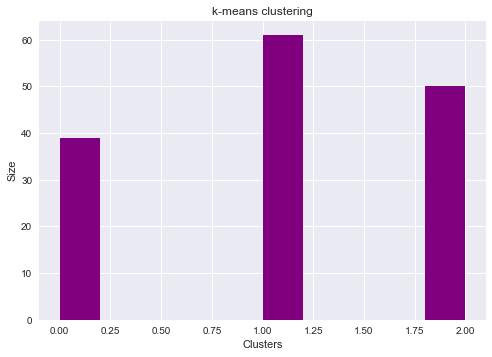

In [72]:
df = pd.DataFrame(predicted_labels)
df.hist(color = 'purple')
plt.ylabel('Size')
plt.xlabel('Clusters')
plt.title('k-means clustering')